In [19]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv("TitanicData.csv")

In [20]:
df.replace('?',np.nan, inplace=True) #Converting ? to NaN so that colums can be converted to floats

In [21]:
df = df.astype( {'age': np.float64, 'fare': np.float64} )
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body          object
home.dest     object
dtype: object

<AxesSubplot:xlabel='survived', ylabel='fare'>

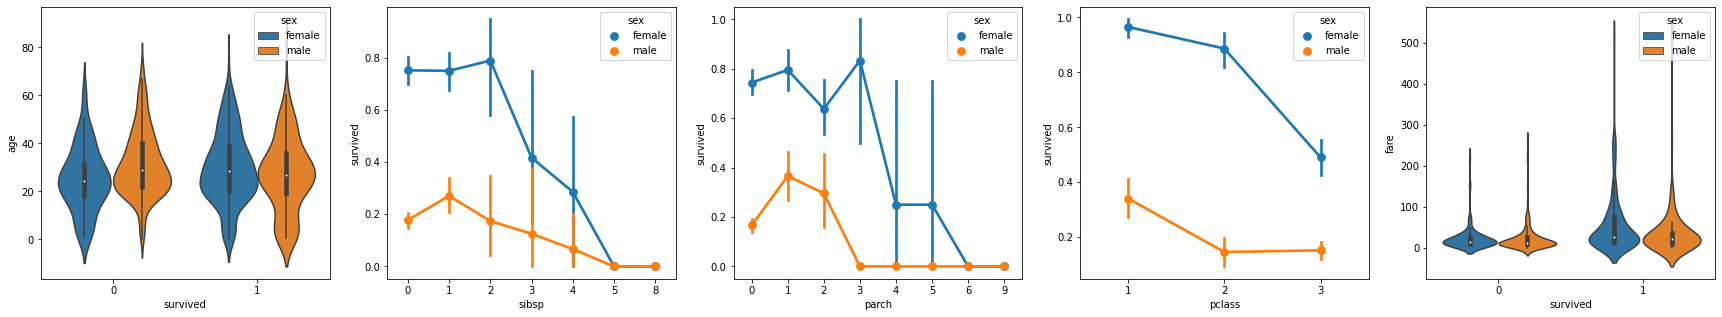

In [22]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=df, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=df, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=df, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=df, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=df, ax=axs[4])

In [23]:
df.replace({'male':1, 'female':0}, inplace=True)

In [24]:
df.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [25]:
df['relatives']= df.apply(lambda row: (row['sibsp']+row['parch']) > 0,axis=1)

In [26]:
df.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [27]:
df = df[['sex','pclass','age','relatives','fare','survived']].dropna()

# Training Models using Scikit Learn

Split the data into training and testing data.
Normalise the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df[['sex','pclass','age','relatives','fare']], df.survived, test_size=0.2, random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### Apply Naive Bayes to the training data to train the model

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Test the Accuracy of the Model against Test Data

In [32]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


# Neural Network with Keras

In [33]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [34]:
model.add(Dense(5, kernel_initializer='uniform', activation='relu', input_dim=5))
model.add(Dense(5, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5837
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6914
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.7656
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.7679
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7703
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.7763
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7727
Epoch 11/50
27/27 [

In [38]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
print(metrics.accuracy_score(y_test, y_pred))

0.7751196172248804
